<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Walk_Forward_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [86]:
!pip install -U statsmodels

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

In [88]:
 from sklearn.metrics import mean_squared_error
 from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [89]:
df = pd.read_csv('/content/airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [90]:
df.index.freq = 'MS'

In [91]:
df.shape

(144, 1)

In [92]:
#Assume the forecast horizon we care about is 12
#Validate over 10 steps
h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [93]:
#Configuration hyperparameters to try
trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True,False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True,False,0]

In [94]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug=False):

    #Store errors
    errors = []
    seen_last = False
    steps_completed = 0

    for end_of_train in range(Ntest,len(df)-h+1):
        train = df.iloc[:end_of_train]
        test = df.iloc[end_of_train:end_of_train + h]

        if test.index[-1] == df.index[-1]:
          seen_last = True

        steps_completed += 1

        #Train the model
        hw = ExponentialSmoothing(
          train['Passengers'],
          initialization_method = init_method,
          trend = trend_type,
          damped_trend = damped_trend,
          seasonal = seasonal_type,
          seasonal_periods = 12,
          use_boxcox = use_boxcox
        )
        res_hw = hw.fit()

        #Compute error for the forecast horizon
        fcast = res_hw.forecast(h)
        error = mean_squared_error(test['Passengers'],fcast)
        errors.append(error)

    if debug:
        print('seen_last: ', seen_last)
        print('Steps completed: ',steps_completed)

    return np.mean(errors)

In [95]:
#Test our function
walkforward('add','add',False,'legacy-heuristic',0,debug = True)

seen_last:  True
Steps completed:  10


1448.5344452151644

In [96]:
#Iterate through all possible options
tuple_of_option_lists = (
    trend_type_list,
    seasonal_type_list,
    damped_trend_list,
    init_method_list,
    use_boxcox_list
)

#Show all the combination
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [97]:
#Set best score to infinity
best_score = float('inf')
#Set best options to none
best_option = None

for x in itertools.product(*tuple_of_option_lists):
    score = walkforward(*x)

    if score < best_score:
        print("Best score so far : ",score)
        best_score = score
        best_option = x


Best score so far :  412.8172974447663
Best score so far :  397.5872563558714
Best score so far :  368.7875802314191
Best score so far :  320.66417039593273
Best score so far :  308.1359546249236


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow 

Best score so far :  305.6593349312611
Best score so far :  299.8202726489487
Best score so far :  261.8795073548492
Best score so far :  249.57507607273482


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow 

In [98]:
print("Best Score : ",best_score)

trend_type,seasonal_type,damped_trend,init_method,use_boxcox = best_option
print("trend_type    : ", trend_type)
print("seasonal_type : ",seasonal_type)
print("damped_trend  : ",damped_trend)
print("init_method   : ",init_method )
print("use_boxcox    : ",use_boxcox)

Best Score :  249.57507607273482
trend_type    :  mul
seasonal_type :  add
damped_trend  :  False
init_method   :  legacy-heuristic
use_boxcox    :  False


In [107]:
from scipy.stats import boxcox
NTest = 12
train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

hw = ExponentialSmoothing(
    train['Passengers'],
    initialization_method = 'legacy-heuristic',
    trend = 'mul',seasonal = 'mul',damped_trend = True,
    seasonal_periods = 12,
    use_boxcox = False
)
res_hw = hw.fit()

In [108]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

<Axes: xlabel='Month'>

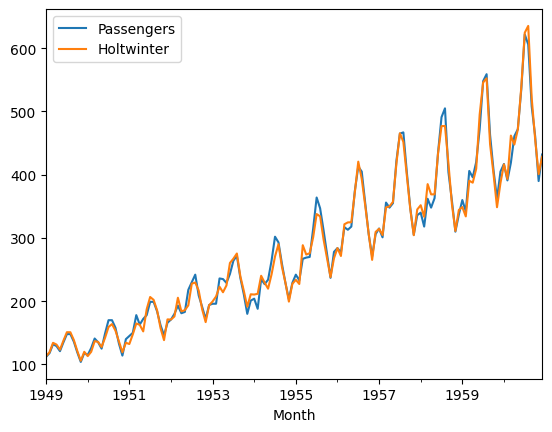

In [109]:
df.loc[train_idx,'Holtwinter'] = res_hw.fittedvalues
df.loc[test_idx,'Holtwinter'] = res_hw.forecast(NTest)
df[['Passengers','Holtwinter']].plot()

In [110]:
from sklearn.metrics import mean_absolute_error
print("Train Mean Absolute Error : ", mean_absolute_error(train['Passengers'],res_hw.fittedvalues))
print("Test  Mean Absolute Error : ", mean_absolute_error(test['Passengers'],res_hw.forecast(NTest)))

Train Mean Absolute Error :  7.640007969952023
Test  Mean Absolute Error :  10.625839568131772
